<div align="center">
    <h1>Amiya Das (22ce01057)</h1>
    <h3>Assignment-1</h3>
</div>  

<h3>Question-5</h3>

4.) Write a Julia code for the solution of the beam problem shown in Fig. 2. Plot the BMD and SFD. Your code should be generic enough to take any value for the input variables l and q.

![My chart](A1_CADlabCourse_page1_image.png)

In [1]:
using Plots
using CalculusWithJulia
using LaTeXStrings
using Symbolics

In [2]:
# --- Input variables ---
# Define the total length of the main span (l) and the uniform load (q).
# You can change these values to see how the diagrams change.
l = 10.0   # Length parameter in meters
q = 5.0    # Uniform distributed load in N/m

# Create an array of x-values for the plot, spanning the entire beam length.
x_values = range(0, stop=2l, length=200)

# Spport reactions
R_A = 0.4 * q * l
R_B = 0.98 * q * l 
R_C = 1.8 * q * l - R_A - R_B;

In [3]:
function shear_force(x, l, q, R_A, R_B)
    if x <= 0.4l
        # Section AE (0 <= x <= 0.4l)
        return R_A
    elseif x <= 0.8l
        # Section ED (0.4l < x <= 0.8l)
        return R_A - (0.8 * q * l)
    elseif x <= l
        # Section DB (0.8l < x <= l)
        return R_A - (0.8 * q * l)
    else
        # Section BC (l < x <= 2l)
        # Shear force is the sum of forces to the left of x.
        return R_A - (0.8 * q * l) + R_B - q * (x - l)
    end
end

V_values = [shear_force(x, l, q, R_A, R_B) for x in x_values];

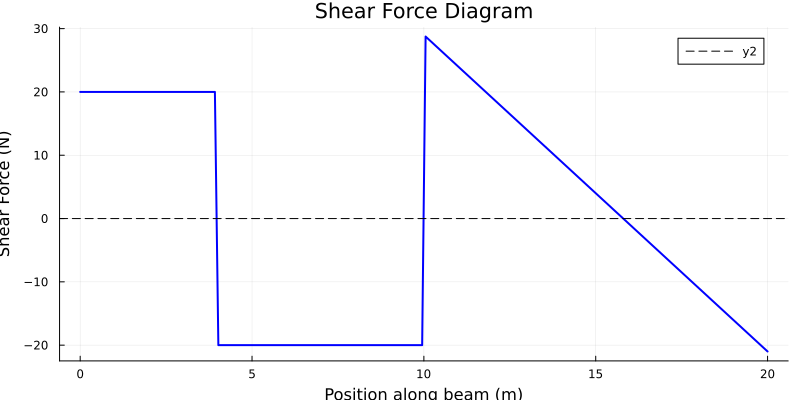

In [8]:
# Plot the Shear Force Diagram (SFD).
sfd_plot = plot(x_values, V_values,
    title="Shear Force Diagram",
    xlabel="Position along beam (m)",
    ylabel="Shear Force (N)",
    label="",
    lw=2,
    linecolor=:blue,
    grid=true,
    size=(800, 400))
hline!([0], lw=1, linecolor=:black, linestyle=:dash);

# Display the plots.
plot(sfd_plot)
savefig(sfd_plot, "SFD.png")
display(sfd_plot)

In [5]:
function bending_moment(x, l, q, R_A, R_B)
    if x <= 0.4l
        # Section AE (0 <= x <= 0.4l)
        return R_A * x
    elseif x <= 0.8l
        # Section ED (0.4l < x <= 0.8l)
        return R_A * x - (0.8 * q * l) * (x - 0.4l)
    elseif x <= l
        # Section DB (0.8l < x <= l)
        # Moment is the same as the previous section, as no new loads are introduced.
        return R_A * x - (0.8 * q * l) * (x - 0.4l)
    else
        # Section BC (l < x <= 2l)
        return R_A * x - (0.8 * q * l) * (x - 0.4l) + R_B * (x - l) - (q * (x - l)^2) / 2
    end
end

M_values = [bending_moment(x, l, q, R_A, R_B) for x in x_values];

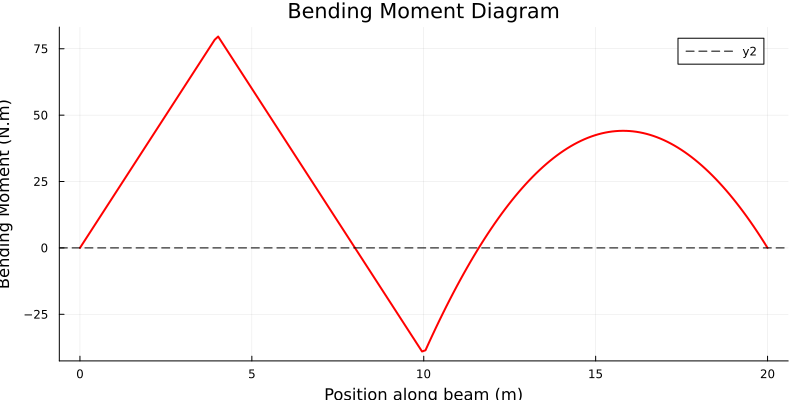

In [7]:
# Plot the Bending Moment Diagram (BMD).
bmd_plot = plot(x_values, M_values,
    title="Bending Moment Diagram",
    xlabel="Position along beam (m)",
    ylabel="Bending Moment (N.m)",
    label="",
    lw=2,
    linecolor=:red,
    grid=true,
    size=(800, 400))
hline!([0], lw=1, linecolor=:black, linestyle=:dash);

# Display the plots.
plot(bmd_plot)
savefig(bmd_plot, "BMD.png")
display(bmd_plot)